# Kredi Tahmini - Sınıflandırma

#### **İş Hedefi**

Bu projede bir finans kurumunun, kimin iyi bir müşteri olacağını belirlemek için tahmine dayalı bir model oluşturulacaktır.
<br>
<img src="https://i.pinimg.com/originals/41/b0/08/41b008395e8e7f888666688915750d1f.gif">

#### **Projede kullanılan veri setindeki alanlar ve açıklamaları**:
Anladım, anlamını değiştirmeden sadece sağ tarafı Türkçe'ye çevireceğim. İşte çevrilmiş hali:

* **Loan ID**: Kredi bilgileri için benzersiz bir tanımlayıcı.
* **Customer ID**: Müşteri için benzersiz bir tanımlayıcı. Müşterilerin birden fazla kredisi olabilir.
* **Loan Status**: Kredinin geri ödenip ödenmediğini veya temerrüde düştüğünü gösteren kategorik bir değişken.
* **Current Loan Amount**: Tamamen ödenen kredi miktarı veya temerrüde düşen miktar.
* **Term**: Kısa vadeli veya uzun vadeli kredi olduğunu belirten kategorik bir değişken.
* **Credit Score**: Borçlunun kredi geçmişinin risk düzeyini 0 ile 800 arasında gösteren bir değer.
* **Years in current job**: Müşterinin şu anki işinde kaç yıldır olduğunu belirten kategorik bir değişken.
* **Home Ownership**: Ev sahipliğini belirten kategorik bir değişken. Değerler "Kiralık" (Rent), "Ev Mortgage'i" (Home Mortgage) ve "Sahip" (Own) şeklindedir. Eğer değer "Sahip" ise, müşteri ipoteksiz ev sahibidir.
* **Annual Income**: Müşterinin yıllık geliri.
* **Purpose**: Kredi amacını açıklayan bir açıklama.
* **Monthly Debt**: Müşterinin mevcut kredileri için aylık ödemesi.
* **Years of Credit History**: Müşterinin kredi geçmişindeki ilk kayıttan bu yana geçen yıllar.
* **Months since last delinquent**: Son kredi gecikme ödemesinden bu yana geçen ay sayısı.
* **Number of Open Accounts**: Açık kredi kartı sayısı.
* **Number of Credit Problems**: Müşteri kayıtlarındaki kredi sorunu sayısı.
* **Current Credit Balance**: Müşterinin mevcut toplam borcu.
* **Maximum Open Credit**: Tüm kredi kaynakları için maksimum kredi limiti.
* **Bankruptcies**: İflas sayısı.
* **Tax Liens**: Vergi haczi sayısı.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv("LoansTrainingSet.csv")

In [3]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [5]:
# Hedef alanı tanımayla başlayalım
df["Loan Status"].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [6]:
df["Loan Status"].value_counts()

Loan Status
Fully Paid     176191
Charged Off     80793
Name: count, dtype: int64

In [7]:
#Hedef alanı sayıya çevirelim
df["Loan Status"]=df["Loan Status"].map({'Fully Paid': 1, 'Charged Off': 0})

In [8]:
# Veride dengesizlik var. Biraz denge sağlayalım

In [9]:
'''
# Verilerdeki dengesizliği dengeleyelim
df1=df[df["Loan Status"]==0]
df2=df[df["Loan Status"]==1].sample(80793)
df1.shape, df2.shape
'''

'\n# Verilerdeki dengesizliği dengeleyelim\ndf1=df[df["Loan Status"]==0]\ndf2=df[df["Loan Status"]==1].sample(80793)\ndf1.shape, df2.shape\n'

In [10]:
'''
df=pd.concat([df1, df2])
df.shape
'''

'\ndf=pd.concat([df1, df2])\ndf.shape\n'

In [11]:
# Tekrarlı veri var mı diye bakalım
df.duplicated(keep=False).value_counts()

False    223766
True      33218
Name: count, dtype: int64

In [12]:
# Tekrarlı verileri silelim
df.drop_duplicates(inplace=True)

In [13]:
# Aynı kişiye ait tekrarlı veri var mı?
df.duplicated(subset=["Loan ID", "Customer ID"], keep=False).value_counts()

False    192288
True      48086
Name: count, dtype: int64

In [14]:
# Kimden kaçar veri var?
duplicate_counts = df.groupby(['Loan ID', 'Customer ID']).size().reset_index(name='Adet').sort_values("Adet", ascending=False)
duplicate_counts = duplicate_counts[duplicate_counts["Adet"]>1]
duplicate_counts

,Loan ID,Customer ID,Adet
131848,9c73183b-73c3-4875-a405-5dd7d82d64b6,c8538f69-ff07-4ffa-9c53-85e50d3c6d62,4
177630,d2bfdcba-e2ef-4161-8559-c6d36358b1f5,4b144bee-9d73-4282-83ef-97455877a7bf,4
20531,1876efee-4838-4635-91c9-5bf25502a131,c33f1afb-5815-46f2-b300-748be09cb3c4,4
135280,a09258ed-dab3-48bb-96a0-a0835510e49d,059c150c-e3d9-4bb2-8912-7ac0295d70f8,4
70831,540dbbbe-f954-4481-babd-75042c6ce30a,27ef5e34-d479-4152-a0ac-d5eb3f59ea73,4
...,...,...,...
106850,7edeae63-e9be-43c7-95f2-3f98bdbcb247,8ace3d1d-6f21-4ac3-97e9-f544ffe6342d,2
68193,50f22143-07c7-4988-a57c-0838d791c08f,a963f69c-fe02-4a78-93ee-b161f157da9b,2
57836,44a62fe2-bffd-4049-8c97-b1d2a51653e8,1c0df0e2-a008-45ca-ab38-3f411db0e868,2
139599,a5acedf3-3df6-46f2-8737-40449caac336,0da4e436-5a12-4b64-92ae-cc3ba9e5880d,2


In [15]:
df[df["Loan ID"]=="d2bfdcba-e2ef-4161-8559-c6d36358b1f5"]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
211824,d2bfdcba-e2ef-4161-8559-c6d36358b1f5,4b144bee-9d73-4282-83ef-97455877a7bf,0,34762,Long Term,6910.0,1 year,Rent,204599.0,Home Improvements,"$2,574.54",17.7,13.0,10,0,10402,20845,0.0,0.0
211825,d2bfdcba-e2ef-4161-8559-c6d36358b1f5,4b144bee-9d73-4282-83ef-97455877a7bf,0,35833,Long Term,6910.0,1 year,Rent,210903.0,Home Improvements,"$2,653.86",17.7,13.0,10,0,10722,21488,0.0,0.0
211826,d2bfdcba-e2ef-4161-8559-c6d36358b1f5,4b144bee-9d73-4282-83ef-97455877a7bf,0,35833,Long Term,NaN,1 year,Rent,NaN,Home Improvements,"$2,653.86",17.7,13.0,10,0,10722,21488,0.0,0.0
211827,d2bfdcba-e2ef-4161-8559-c6d36358b1f5,4b144bee-9d73-4282-83ef-97455877a7bf,0,34762,Long Term,691.0,1 year,Rent,204599.0,Home Improvements,"$2,574.54",17.7,13.0,10,0,10402,20845,0.0,0.0


In [16]:
# Bu örnekte olduğu gibi çift kayıtların bazılarında Credit Score yanlışlıkla 10 kat fazla yazılmış bunu düzeltmek için 800 den büyük olanları 10 a bölelim
df["Credit Score"] = np.where(df["Credit Score"]>800, df["Credit Score"]/10, df["Credit Score"])

In [17]:
df[df["Loan ID"]=="1876efee-4838-4635-91c9-5bf25502a131"]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
24448,1876efee-4838-4635-91c9-5bf25502a131,c33f1afb-5815-46f2-b300-748be09cb3c4,0,23774,Long Term,683.0,1 year,Rent,138684.0,Debt Consolidation,"$2,218.94",13.5,NaN,21,0,25539,34189,0.0,0.0
24449,1876efee-4838-4635-91c9-5bf25502a131,c33f1afb-5815-46f2-b300-748be09cb3c4,0,24149,Long Term,NaN,1 year,Rent,NaN,Debt Consolidation,"$2,253.89",13.5,NaN,21,0,25941,34727,0.0,0.0
24450,1876efee-4838-4635-91c9-5bf25502a131,c33f1afb-5815-46f2-b300-748be09cb3c4,0,24149,Long Term,683.0,1 year,Rent,140868.0,Debt Consolidation,"$2,253.89",13.5,NaN,21,0,25941,34727,0.0,0.0
24451,1876efee-4838-4635-91c9-5bf25502a131,c33f1afb-5815-46f2-b300-748be09cb3c4,0,23774,Long Term,683.0,1 year,Rent,138684.0,Debt Consolidation,"$2,218.94",13.5,NaN,21,0,25539,34189,0.0,0.0


In [18]:
# Yukarıdaki örnekte çift kayıtların bazılarında Credit Score ve Annual Income değerleri boş. Bunun için boş kayıtları bu alanların max değerleri ile doldurup yine tamamen duplicate olanları temizleyebiliriz
df['Credit Score'].fillna(df.groupby(["Loan ID", "Customer ID"])['Credit Score'].transform('max'), inplace=True)
df['Annual Income'].fillna(df.groupby(["Loan ID", "Customer ID"])['Annual Income'].transform('max'), inplace=True)

In [19]:
df[df["Loan ID"]=="805791f9-5a98-4eb1-8009-f2c91a8171b4"]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
129032,805791f9-5a98-4eb1-8009-f2c91a8171b4,697b18b6-3ae6-4898-8b1c-868a9a08d694,0,19956,Short Term,740.0,2 years,Home Mortgage,92079.0,Other,$741.61,16.1,NaN,23,0,29724,65185,0.0,0.0
129033,805791f9-5a98-4eb1-8009-f2c91a8171b4,697b18b6-3ae6-4898-8b1c-868a9a08d694,0,19956,Short Term,740.0,2 years,Home Mortgage,89802.0,Other,$741.61,16.1,NaN,23,0,29724,65185,0.0,0.0
129034,805791f9-5a98-4eb1-8009-f2c91a8171b4,697b18b6-3ae6-4898-8b1c-868a9a08d694,0,20462,Short Term,740.0,2 years,Home Mortgage,92079.0,Other,$760.42,16.1,NaN,23,0,30478,66838,0.0,0.0


In [20]:
df.duplicated(subset=["Loan ID", "Customer ID"], keep=False).value_counts()

False    192288
True      48086
Name: count, dtype: int64

In [21]:
# Yeterli temizliği yaptıktan sonra aynı kişiye ait aynı kredi kaydının kopyalarını temizleyelim
df.drop_duplicates(subset=["Loan ID", "Customer ID"], keep=False, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192288 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       192288 non-null  object 
 1   Customer ID                   192288 non-null  object 
 2   Loan Status                   192288 non-null  int64  
 3   Current Loan Amount           192288 non-null  int64  
 4   Term                          192288 non-null  object 
 5   Credit Score                  147793 non-null  float64
 6   Years in current job          184657 non-null  object 
 7   Home Ownership                192288 non-null  object 
 8   Annual Income                 147793 non-null  float64
 9   Purpose                       192288 non-null  object 
 10  Monthly Debt                  192288 non-null  object 
 11  Years of Credit History       192288 non-null  float64
 12  Months since last delinquent  86527 non-null   fl

In [23]:
df["Term"].unique()

array(['Short Term', 'Long Term'], dtype=object)

In [24]:
df["Term"]=df["Term"].map({'Long Term': 1, 'Short Term': 0})

In [25]:
df["Years in current job"].unique()

array(['10+ years', '4 years', '5 years', nan, '3 years', '2 years',
       '6 years', '1 year', '< 1 year', '7 years', '9 years', '8 years'],
      dtype=object)

In [26]:
df["Years in current job"]=df["Years in current job"].map({'10+ years': 10, '9 years': 9, '8 years': 8, '7 years': 7, 
                                                           '6 years': 6, '5 years': 5, '4 years': 4, '3 years': 3,
                                                          '2 years': 2, '1 year': 1, '< 1 year': 0})

In [27]:
df["Home Ownership"].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [28]:
df["Purpose"].unique()

array(['Debt Consolidation', 'other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Other', 'Buy a Car',
       'Medical Bills', 'Take a Trip', 'Educational Expenses'],
      dtype=object)

In [29]:
# Yukarıdaki obje alanları kategoriye çevirelim
df["Home Ownership"]=df["Home Ownership"].astype("category")
df["Purpose"]=df["Purpose"].astype("category")

In [30]:
# Metin karakterinden kurtarıp alanı sayıya çevirelim
df['Monthly Debt'] = df['Monthly Debt'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [31]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,0,741.0,10.0,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,0,734.0,4.0,Home Mortgage,42269.0,other,1106.04,26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,0,747.0,10.0,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,0,747.0,10.0,Own Home,38072.0,Debt Consolidation,751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,0,746.0,4.0,Rent,50025.0,Debt Consolidation,355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan Status,192288.0,9.162870e-01,2.769576e-01,0.0,1.0,1.00,1.000,1.00
Current Loan Amount,192288.0,1.832225e+07,3.867054e+07,505.0,8366.0,14734.50,27390.000,99999999.00
Term,192288.0,2.111780e-01,4.081455e-01,0.0,0.0,0.00,0.000,1.00
Credit Score,147793.0,7.247062e+02,2.554091e+01,585.0,715.0,733.00,742.000,751.00
Years in current job,184657.0,5.879333e+00,3.627512e+00,0.0,3.0,6.00,10.000,10.00
Annual Income,147793.0,7.397535e+04,5.947579e+04,4134.0,45296.0,63564.00,89116.000,8713547.00
Monthly Debt,192288.0,9.585857e+02,6.360065e+02,0.0,524.7,838.01,1248.655,22939.12
Years of Credit History,192288.0,1.842010e+01,7.047290e+00,3.4,13.7,17.00,21.900,70.50
Months since last delinquent,86527.0,3.513711e+01,2.176272e+01,0.0,17.0,32.00,51.000,176.00
Number of Open Accounts,192288.0,1.105412e+01,4.967239e+00,0.0,8.0,10.00,14.000,76.00


<Axes: ylabel='Current Loan Amount'>

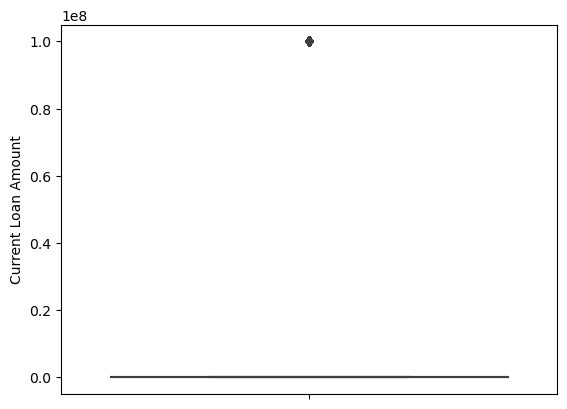

In [33]:
sns.boxplot(y=df["Current Loan Amount"])

In [34]:
# Current Loan Amount alanındaki uç değerden kurtulalım
df=df[df["Current Loan Amount"]!=99999999.00]

In [35]:
# Maximum Open Credit alanı sayı olmasına rağmen infoda neden obje olarak görünüyor?
df["Maximum Open Credit"].unique()

array([16056, 19149, 28335, ..., 37004, 44080, 62371], dtype=object)

In [36]:
# Sayısal olmayan kayıtları filtreleyelim ve sayıya çevirelim
df['Maximum Open Credit'] = pd.to_numeric(df['Maximum Open Credit'], errors='coerce')

In [37]:
# Acaba sayısal olmayan kayıt oluştu mu?
df['Maximum Open Credit'].isnull().sum()

0

### Şimdi boşları dolduralım

In [38]:
# Acaba sayısal olmayan kayıt oluştu mu?
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    44495
Years in current job             6256
Home Ownership                      0
Annual Income                   44495
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    86256
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      342
Tax Liens                          19
dtype: int64

In [39]:
# Kredi skorunu orta değerlerle dolduralım
df['Credit Score'].fillna(df['Credit Score'].median(), inplace=True)

<Axes: xlabel='Years in current job', ylabel='Count'>

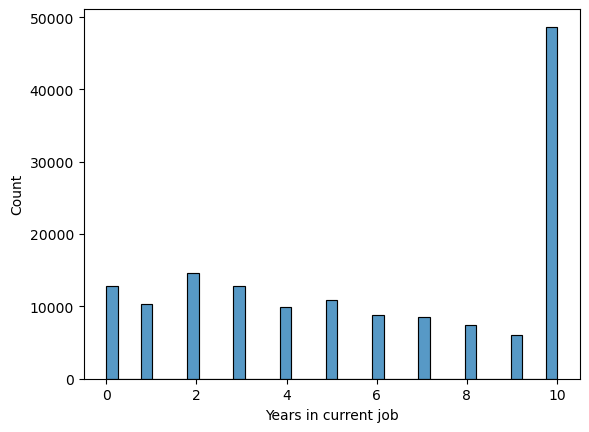

In [40]:
sns.histplot(x="Years in current job", data=df)

In [41]:
# Her iki alanı birbiri ile regresyon ilişkisi kurup boşlukları dolduralım. Ama önce her ikisi de boş olan kayıtları silelim.
df.dropna(subset=['Years in current job', 'Annual Income'], how='all', inplace=True)

In [42]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# 'Years in current job' alanını doldurma
subset = df.dropna(subset=['Years in current job', 'Annual Income'])
X = subset['Annual Income'].values.reshape(-1, 1)
y = subset['Years in current job'].values
model_years = LinearRegression()
model_years.fit(X, y)
missing_years_data = df[df['Years in current job'].isnull()]['Annual Income'].values.reshape(-1, 1)
predicted_years = model_years.predict(missing_years_data)
df.loc[df['Years in current job'].isnull(), 'Years in current job'] = predicted_years

# 'Annual Income' alanını doldurma
subset = df.dropna(subset=['Years in current job', 'Annual Income'])
X = subset['Years in current job'].values.reshape(-1, 1)
y = subset['Annual Income'].values
model_income = LinearRegression()
model_income.fit(X, y)
missing_income_data = df[df['Annual Income'].isnull()]['Years in current job'].values.reshape(-1, 1)
predicted_income = model_income.predict(missing_income_data)
df.loc[df['Annual Income'].isnull(), 'Annual Income'] = predicted_income

# Sonucu görüntüle
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                        0
Years in current job                0
Home Ownership                      0
Annual Income                       0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    85340
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      342
Tax Liens                          19
dtype: int64

<Axes: xlabel='Bankruptcies', ylabel='Count'>

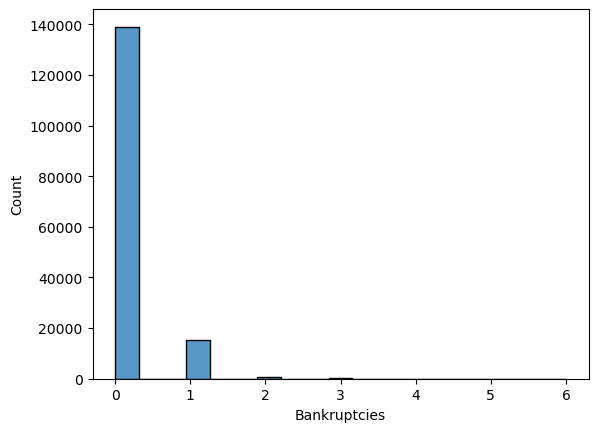

In [43]:
sns.histplot(x="Bankruptcies", data=df)

In [44]:
df['Bankruptcies'] = df['Bankruptcies'].fillna(0)

<Axes: xlabel='Tax Liens', ylabel='Count'>

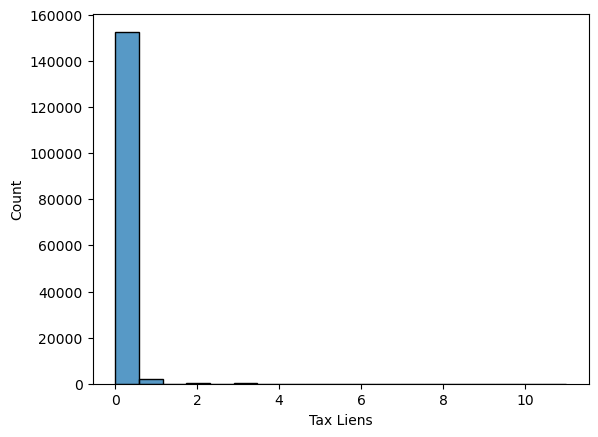

In [45]:
sns.histplot(x="Tax Liens", data=df)

In [46]:
df['Tax Liens'] = df['Tax Liens'].fillna(0)

In [47]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                        0
Years in current job                0
Home Ownership                      0
Annual Income                       0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    85340
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                        0
Tax Liens                           0
dtype: int64

### Modellemeye başlayalım

In [48]:
# Önce dengesizlik var mı bakalım
df['Loan Status'].value_counts()

Loan Status
1    139452
0     15959
Name: count, dtype: int64

In [49]:
'''
# Verilerdeki dengesizliği dengeleyelim
df1=df[df["Loan Status"]==0]
df2=df[df["Loan Status"]==1].sample(15959)
df1.shape, df2.shape
'''

'\n# Verilerdeki dengesizliği dengeleyelim\ndf1=df[df["Loan Status"]==0]\ndf2=df[df["Loan Status"]==1].sample(15959)\ndf1.shape, df2.shape\n'

In [50]:
'''
df=pd.concat([df1, df2])
df.shape
'''

'\ndf=pd.concat([df1, df2])\ndf.shape\n'

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

g = GaussianNB()
b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()

def algo_test(x, y):
    modeller=[g, b, l, d, r, gb, kn]
    isimler=["GaussianNB", "BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(np.array(x_test) if model==kn else x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(tahmin, y_test))
        precision.append(precision_score(tahmin, y_test))
        recall.append(recall_score(tahmin, y_test))
        f1.append(f1_score(tahmin, y_test))
        print(confusion_matrix(tahmin, y_test))

    print("Eğitim tamamlandı.")
    
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(tahmin, y_test))
    print("classification Report:")
    print(classification_report(tahmin, y_test))
    print("Diğer Modeller:")
    
    return metrics.drop("Model", axis=1)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155411 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   Loan ID                       155411 non-null  object  
 1   Customer ID                   155411 non-null  object  
 2   Loan Status                   155411 non-null  int64   
 3   Current Loan Amount           155411 non-null  int64   
 4   Term                          155411 non-null  int64   
 5   Credit Score                  155411 non-null  float64 
 6   Years in current job          155411 non-null  float64 
 7   Home Ownership                155411 non-null  category
 8   Annual Income                 155411 non-null  float64 
 9   Purpose                       155411 non-null  category
 10  Monthly Debt                  155411 non-null  float64 
 11  Years of Credit History       155411 non-null  float64 
 12  Months since last delinquent  70071

In [53]:
x=df.drop(["Loan ID", "Customer ID", "Loan Status", "Months since last delinquent"], axis=1)
y=df[["Loan Status"]]

x=pd.get_dummies(x, drop_first=True)

In [54]:
x.shape, y.shape

((155411, 25), (155411, 1))

In [58]:
# Verilerdeki dengesizliği giderelim
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=42)
x, y = oversample.fit_resample(x, y)

In [60]:
x.shape, y.shape

((278904, 25), (278904, 1))

In [61]:
algo_test(x,y)

Veriler hazır modeller deneniyor
GaussianNB()  modeli eğitiliyor!..
[[27638 26957]
 [  418   768]]
BernoulliNB()  modeli eğitiliyor!..
[[21091  7210]
 [ 6965 20515]]
LogisticRegression()  modeli eğitiliyor!..
[[16761 11179]
 [11295 16546]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[25123  3500]
 [ 2933 24225]]
RandomForestClassifier()  modeli eğitiliyor!..
[[24865   889]
 [ 3191 26836]]
GradientBoostingClassifier()  modeli eğitiliyor!..
[[23028  2069]
 [ 5028 25656]]
KNeighborsClassifier()  modeli eğitiliyor!..
[[27194  8783]
 [  862 18942]]
Eğitim tamamlandı.
En başarılı model:  RandomForestClassifier
Confusion Matrix:
[[24865   889]
 [ 3191 26836]]
classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.92     25754
           1       0.97      0.89      0.93     30027

    accuracy                           0.93     55781
   macro avg       0.93      0.93      0.93     55781
weighted avg       0.93      0.93      0

,Accuracy,Precision,Recall,F1
RandomForestClassifier,0.926857,0.967935,0.893729,0.929353
DecisionTreeClassifier,0.884674,0.873760,0.892002,0.882787
GradientBoostingClassifier,0.872770,0.925374,0.836136,0.878495
KNeighborsClassifier,0.827092,0.683210,0.956473,0.797071
BernoulliNB,0.745881,0.739946,0.746543,0.743230
LogisticRegression,0.597103,0.596790,0.594303,0.595544
GaussianNB,0.509241,0.027701,0.647555,0.053129


## Sonuç

Bu projede bir müşteriye kredi verilip verilmeyeceğini tahmin eden model üzerinde çalışılmış ve en yüksek doğruluk skoru `Random Forest Classifier` modelinde görülmüştür.